# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

# Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

<img src='./assets/bricks.jpg' >

In [2]:
df_colors = pd.read_csv('./data/colors.csv')
df_sets = pd.read_csv('./data/sets.csv')
df_themes = pd.read_csv('./data/themes.csv')
df_colors.head()


,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


UNIQUE COLORS

In [3]:
# np.size(df_colors['name'].unique())
df_colors.nunique()

id          135
name        135
rgb         124
is_trans      2
dtype: int64

In [4]:
df_sets.tail()
# df_sets.describe()
# df_sets.value_counts()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


In [5]:
df_sets['num_parts'].idxmax()

15004

In [6]:
df_sets.iloc[15004]

set_num                           BIGBOX-1
name         The Ultimate Battle for Chima
year                                  2015
theme_id                               571
num_parts                             9987
Name: 15004, dtype: object

In which year were the first LEGO sets released and how many sets did the company sell when it first launched?

--> LEGO was launched in the year 1949, it launched a total of 5 lego sets in that particular year.

In [7]:
# df_sets.info()

In [8]:
df_sets.sort_values(['year'])
first_year_lego = df_sets[df_sets['year'] == 1949]
first_year_lego.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 9521 to 9545
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    5 non-null      object
 1   name       5 non-null      object
 2   year       5 non-null      int64 
 3   theme_id   5 non-null      int64 
 4   num_parts  5 non-null      int64 
dtypes: int64(3), object(2)
memory usage: 240.0+ bytes


Which LEGO theme has the most sets? Is it Harry Potter, Ninjago, Friends or something else?

--> Supplemental

In [9]:
df_themes['name'].value_counts()

Supplemental    15
Airport          9
Castle           8
Traffic          7
Construction     7
                ..
Golden Land      1
Fairy-Tale       1
Avatar           1
Atlantis         1
LEGO Art         1
Name: name, Length: 422, dtype: int64

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [10]:
# df_colors[df_colors['is_trans'] == 't'].nunique()
print(np.size(df_colors[df_colors['is_trans'] == 't']))

112


In [11]:
# df_colors[df_colors['is_trans'] == 't']
# df_colors.info()
# df_colors.groupby("is_trans").count()
df_colors['is_trans'].value_counts()

f    107
t     28
Name: is_trans, dtype: int64

**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png 

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

### Understanding LEGO vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.


<img src='./assets/lego_sets.png' >

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [12]:
first_year_lego_released = df_sets.iloc[df_sets['year'].idxmin(axis=0)]
first_year_lego_released

set_num                         700.1-1
name         Extra-Large Gift Set (ABB)
year                               1949
theme_id                            365
num_parts                           142
Name: 9521, dtype: object

In [13]:
df_sets[df_sets['year'] == first_year_lego_released['year']]


,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [14]:
df_sets[df_sets['year'] == 1949]['name']

9521           Extra-Large Gift Set (ABB)
9534                 Large Gift Set (ABB)
9539                Medium Gift Set (ABB)
9544                Small Brick Set (ABB)
9545    Small Doors and Windows Set (ABB)
Name: name, dtype: object

**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [15]:
df_sets[df_sets['year'] ==  first_year_lego_released.year]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [16]:
df_sets.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [17]:
df_sets.sort_values('num_parts',ascending=False).iloc[0:5]

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [18]:
cnt = df_sets.groupby('year')['set_num'].count()
cnt
# cnt.index


year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, Length: 71, dtype: int64

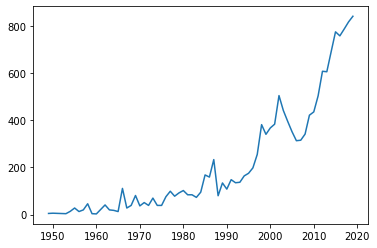

In [19]:
plt.plot(cnt.index[:-2],cnt[:-2])

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

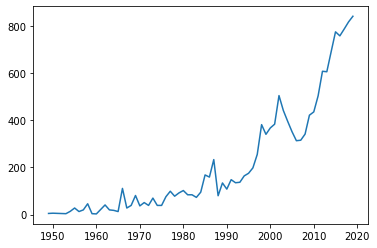

In [20]:
plt.plot(cnt.index[:-2],cnt[:-2])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [21]:
unique_themes_by_year =  df_sets.groupby('year').agg({'theme_id':pd.Series.nunique})

In [22]:
unique_themes_by_year.tail()

,theme_id
year,
2017,89
2018,93
2019,78
2020,82
2021,1


In [23]:
df_sets.groupby('year').aggregate({'theme_id': 'nunique'})

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

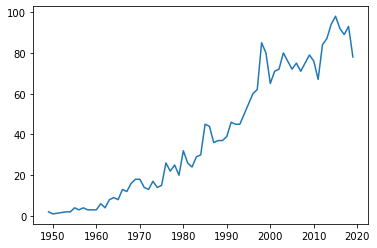

In [24]:
plt.plot(unique_themes_by_year.index[:-2], unique_themes_by_year['theme_id'][:-2])

In [25]:
# fig = px.line(unique_themes_by_year, x=unique_themes_by_year.index[:-2], y=unique_themes_by_year['theme_id'][:-2])
# fig.update_traces(textposition="bottom right")
# fig.show()

### Line Charts with Two Seperate Axes

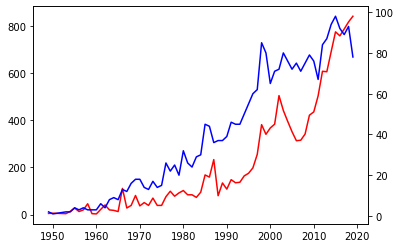

In [26]:
fig,ax = plt.subplots()
ax.plot(cnt.index[:-2],cnt[:-2], color='red')
ax2 = ax.twinx()
ax2.plot(unique_themes_by_year.index[:-2], unique_themes_by_year['theme_id'][:-2], color='blue')
plt.show()

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [27]:
df_sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [28]:
parts_per_set = df_sets.groupby('year').agg({'num_parts':'mean'})

In [29]:
parts_per_set

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


In [30]:
parts_in_1954 = df_sets[df_sets['year']==1954]['num_parts'].sum()
parts_in_1954

173

In [31]:
parts_in_2017 = df_sets[df_sets['year']==2017]['num_parts'].sum()
parts_in_2017

174367

In [32]:
df_sets.groupby('year').aggregate({'num_parts':'mean'}).loc[2017]

num_parts    221.840967
Name: 2017, dtype: float64

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

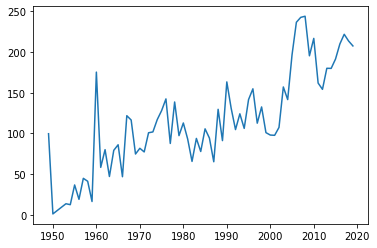

In [33]:
plt.plot(parts_per_set.index[:-2],parts_per_set['num_parts'][:-2])

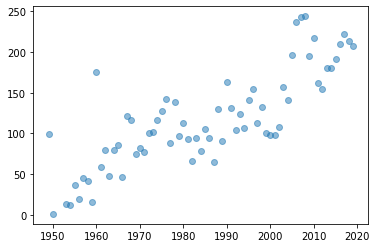

In [34]:
plt.scatter(parts_per_set.index[:-2],parts_per_set['num_parts'][:-2],alpha=0.5)

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [35]:
df_themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [36]:
df_sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [37]:
# pd.merge(left=df_sets, right=df_themes, left_on='theme_id', right_on='id', how='inner')

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [38]:
df_themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [39]:
# df_themes.shape
df_themes.info()
# df_themes.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         596 non-null    int64  
 1   name       596 non-null    object 
 2   parent_id  464 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.1+ KB


In [40]:
df_sets['theme_id'].value_counts()[:5]

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

### Merging (i.e., Combining) DataFrames based on a Key


In [41]:
merged_data = df_sets.merge(df_themes,how='inner',left_on='theme_id',right_on='id')

In [42]:
merged_data.tail(20)

,set_num,name_x,year,theme_id,num_parts,id,name_y,parent_id
15690,9754-1,Dark Side Developers Kit,2000,261,578,261,Star Wars,258.0
15691,9751-1,Control Lab Serial Interface & Adapter,1995,530,2,530,Control Lab,529.0
15692,9797-1,Mindstorms Education NXT Base Set,2006,519,436,519,NXT,518.0
15693,AMFlag-1,American Flag with Sticker For Stars (Legoland...,2002,427,62,427,Holiday,425.0
15694,KLLCA21-1,Santa with Reindeer and Sleigh (Legoland Calif...,2005,427,0,427,Holiday,425.0
15695,llca12-1,3D Witch (Legoland California),2004,427,103,427,Holiday,425.0
15696,llca21-1,Sitting Santa (Legoland California),2005,427,42,427,Holiday,425.0
15697,llca22-1,Santa's Sleigh (Legoland California),2005,427,76,427,Holiday,425.0
15698,llca23-1,Reindeer (Legoland California),2005,427,72,427,Holiday,425.0
15699,LLCAPUM1-1,Build N Buy Pumpkin (Happy) (Legoland California),2002,427,31,427,Holiday,425.0


In [43]:
merged_data.groupby('name_y').count()['name_x'].sort_values(ascending=False)

name_y
Star Wars        776
Gear             656
Basic Set        558
Supplemental     535
Technic          453
                ... 
Legoland           1
Mini               1
RC Train           1
Skull Spiders      1
eLAB               1
Name: name_x, Length: 417, dtype: int64

In [44]:
star_wars_theme =  df_themes[df_themes['name']=='Star Wars']
star_wars_theme

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [45]:
# df_sets[df_sets['theme_id'].isin([18,158,209,261])].shape
merged_data[merged_data['name_y']=='Star Wars']

,set_num,name_x,year,theme_id,num_parts,id,name_y,parent_id
6343,11912-1,Star Wars: Build Your Own Adventure,2016,158,73,158,Star Wars,NaN
6344,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70,158,Star Wars,NaN
6345,20006-1,Clone Turbo Tank - Mini,2008,158,64,158,Star Wars,NaN
6346,20007-1,Republic Attack Cruiser - Mini,2009,158,84,158,Star Wars,NaN
6347,20009-1,AT-TE Walker - Mini,2009,158,94,158,Star Wars,NaN
...,...,...,...,...,...,...,...,...
15162,75279-1,Star Wars Advent Calendar 2020,2020,209,312,209,Star Wars,207.0
15163,7958-1,Star Wars Advent Calendar 2011,2011,209,267,209,Star Wars,207.0
15164,9509-1,Star Wars Advent Calendar 2012,2012,209,235,209,Star Wars,207.0
15689,9748-1,Droid Developer Kit,1999,261,658,261,Star Wars,258.0
